#  Intro to Quantum Computing with Qiskit 
### Tutorial 4 

|||
|-|-|
|**Author:** | Bernardo Villalba Frias|
|**Editor:** | Taha Selim|
|**Date:** |May 5th, 2024|
|**Tutrial 4:** |**Version 0** <br/>*Basics of Quantum Circuits*|
|**Qiskit:** |1.0|
|**Bernardo's email:** | b.r.villalba.frias@hva.nl
|**Taha's email** | t.i.m.m.selim2@hva.nl


This notebook is adapted from the brief introduction to the IBM Qiskit package covered in the Quantum Programming 1 lesson during the minor on Applied Quantum Computing. The IBM Qiskit framework offers a huge variety of very interesting functionalities to explore. Please refer to the [IBM Quantum Documentation](https://qiskit.org/documentation/).


However, Qiskit is not the only quantum programming environment. There are several other options for you to explore, for instance: [Quantum Inspire](https://www.quantum-inspire.com/), [Cirq](https://quantumai.google/cirq), [Q#](https://quantum.microsoft.com/en-us/explore/concepts/qsharp), etc.. Moreover there are multiple software frameworks that offer extensions for quantum computing, for instance: [PennyLane](https://pennylane.ai/), [Yao](https://yaoquantum.org/), [OpenFermion](https://quantumai.google/openfermion), etc.

This tutorial strengths the self-study skills of the students by providing a brief introduction to the basics of quantum circuits. The tutorial is divided into the following sections:

1. **Introduction to Quantum Circuits**
2. **Quantum Gates**
3. **Quantum Circuits in Qiskit**
4. **Exercise**


Let's start by importing the necessary libraries.

In [15]:
%matplotlib inline

# Imports of the Qiskit basic functionalities
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.primitives import Sampler
from qiskit.quantum_info import Statevector, random_statevector
from qiskit.visualization import plot_distribution

import numpy as np

The following functions allow you to represent the quatum states into a notation that you will be more familiar with: `Dirac notation`. 

The `Dirac notation` is a standard notation used in quantum mechanics, composed of the following elements:

- **Ket notation**: $| \psi \rangle$
- **Bra notation**: $\langle \psi |$

The `Dirac notation` is used to represent the quantum states in a more compact and readable way.

Run the following code to represent the quantum states in `Dirac notation`.

In [16]:
# Function: state_to_dirac(quantum_state)
#
# 
# This function accepts an arbitrary state vector and prints it in its
# corresponding Dirac notation.
def state_to_dirac(state):

    # Convert the statevector to dictionary form.
    state_to_dict = state.to_dict()

    return ' '.join('{1:+.4f}|{0}>'.format(key, value)
                      for key, value in state_to_dict.items())


# Function: obtain_vector(quantum_circuit)
#
# 
# This function accepts an arbitrary circuit, performs its state vector
# simulation and returns the resulting vector state.
def obtain_vector(qc):

    # Execute the state vector simulation
    resulting_vector = Statevector(qc)

    # Convert the resulting state vector in its Dirac notation
    dirac_vector = state_to_dirac(resulting_vector)

    return resulting_vector, dirac_vector


# Function: simulate_circuit(quantum_circuit, number_shots)
#
# 
# This function accepts an arbitrary circuit, performs a multi-shot
# simulation and returns the results.
def simulate_circuit(qc, trials = 100000):

    # Execute the simulation for the given number of shots
    job = Sampler().run(qc, shots = trials)

    # Collect the results from the job
    result = job.result()

    # Obtain the counts from the results
    statistics = result.quasi_dists[0].binary_probabilities()

    return result, statistics



### Example 1: Representing the quantum states in Dirac notation

In this example, we study a basic quantum circuits. The quantum circuit consists of a single qubit. The qubit is initialized in the state $|0\rangle$ and then passed through a `Pauli-X` gate. The Pauli-X gate is a quantum gate that flips the state of the qubit. The state of the qubit after passing through the Pauli-X gate is $|1\rangle$.

![Example1](mid_way_src/example1.png)

The basic template of a quantum program contains two parts:

1. Create and design a circuit.
2. Run the circuit.

For the first point, we will need our first QuantumCircuit. We start by creating a very simple [QuantumCircuit](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#quantumcircuit) with 1 qubit and 1 output. Hence, we need a [QuantumRegister](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumRegister#quantumregister). Additionally, we are going to measure such qubit; therefore we will also need a [ClassicalRegister](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.ClassicalRegister#classicalregister).

After creating the circuit, we will add the gates to be applied. In this example, that will be the [X gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#x). Moreover, you can [draw](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#draw) the circuit to see how it looks.

Let's start by creating the circuit. Follow the instructions in the code cell below.


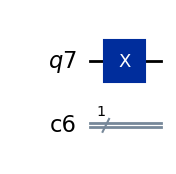

In [18]:
# Defining the quantum register with 1 qubit
qr = QuantumRegister(1)

# Defining the classical register with 1 bit
cr = ClassicalRegister(1)

# Defining the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply the Pauli-X gate to the qubit
qc.x(qr[0])

# Draw the circuit
qc.draw(output='mpl')

### Example 2: Circuit Simulations

In this example, we will simulate the quantum circuit using a simulator. The simulator is a classical computer program that simulates the quantum circuit and emulate the performance of a quantum computer. The simulator is used to test the quantum circuit before running it on a real quantum computer.


A quantum state is described by a linear combination of the basis states. This linear combination is defined by the probability amplitudes. Additionally, when measuring a qubit, it collapses towards one of the basis states. In order to show this probabilistic process, it is necessary to perform a simulation of the quantum system. When running a sufficient amount of times, we will be able to observe and infer the probability amplitudes of the resulting vector state.

Qiskit allows us to run simulations of our quantum circuits, to measure the results and to extract information from those results. In this basic notebook, we will mention:

1. [Statevector](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Statevector#statevector)
2. [Sampler](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Sampler)

Each one of them is used for a specific purpose. In this example, we are going to use `Sampler` which allows you to execute multiple shots simulations. In order to perform this type of simulation, the circuit must include the [measure](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#measure). Then, you can use the [run](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Sampler#run) method to actually execute the simulation. The [result](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.RuntimeJob#result) method will collect the results of your simulation, including the [quasi-probabilities](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.SamplerResult#quasi_dists).

Take a look at the previously defined function (`simulate_circuit`) to understand how it works.

You will need to replace the variable `Your_Circuit` with name of the circuit you have created.

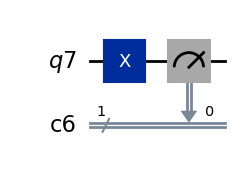

In [19]:
# Map the quantum measurement to the classical bit
qc.measure(qr[0], cr[0])

# Execute the simulation for 10000 trials
result, statistics = simulate_circuit(qc, 10000)

# Draw the quantum circuit
qc.draw(output='mpl')

In Qiskit, the qubits are always initialized to $\ket{0}$. As you know, the `X gate` changes the state of the qubit; hence you could expect to obtain a $\ket{1}$ state after the simulation. It is also possible to plot a histogram with the results, by using the [plot_distribution](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_distribution#qiskitvisualizationplot_distribution) command.

Execute the code cell below to plot the results. The code should work fine if you have implemented everything correctly.

Probabilities:


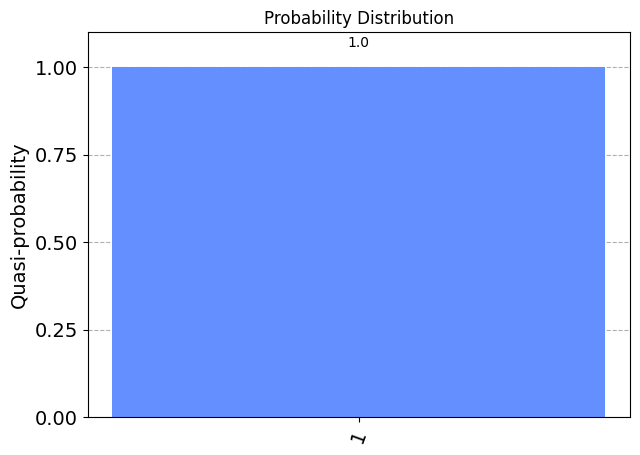

In [20]:
# Plotting the histogram of the results
print("Probabilities:")
plot_distribution(statistics, title = "Probability Distribution")

Now, we could use these functions to implement more realistic, altought simple, circuits. However, before going into those circuits, let's try some more basic stuff.

Imagine that you want to `see` a quantum state. It is possible to plot a graphical representation of a single quantum state in the so-called: Bloch sphere. The Qiskit function [plot_bloch_multivector](https://docs.quantum.ibm.com/api/qiskit/qiskit.visualization.plot_bloch_multivector#qiskitvisualizationplot_bloch_multivector), allows us to plot into the Bloch sphere.

## Example 3: Initialization and visualization

As mentioned before, Qiskit initializes the qubit in the $\ket{0}$ state. However, in some cases, could be useful to define a specific, or even random, initial state. The qubit is initialized by using the function: [initialize](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#initialize).

This example uses the `Statevector` to execute a single shot of a Qiskit `QuantumCircuit` that have been previously initialized with a random state. Then, it prints the final quantum statevector of the simulation, and finally, it plots the resulting vector in the Bloch sphere.

Take a look at the previously defined functions (`obtain_vector` and `state_to_dirac`) to understand how they work.

In [21]:
# Defining the quantum circuit
circuit2 = QuantumCircuit(qr, cr)

# Set the random state flag
rnd_flag = 1

if rnd_flag:
    ket_psi = random_statevector(2)
    circuit2.initialize([ket_psi[0], ket_psi[1]], 0)
else:
    circuit2.initialize([3 / 5, 4 / 5], 0)

# Obtain the state vector 
resulting_vector, dirac_vector = obtain_vector(circuit2)
# Print the resulting transformation

# Drawing the circuit


Bloch sphere:


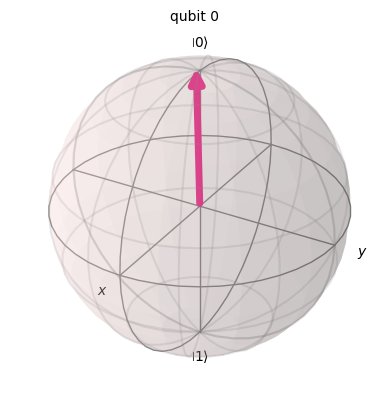

In [22]:
# Plot the resulting state in the Bloch sphere
print("Bloch sphere:")
resulting_vector.draw('bloch')


#### Exercise 1: A bit more complicated circuit

During this workshop, we have presented various quantum gates such as the [X gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#x), the [Hadamard gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#h), and the [T gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#t). Single-qubit quantum gates are an important part of Qiskit, hence we will start using them into a more complex circuit.

As you may understand, the goal of this workshop is not to present every single gate that you could use in your circuits. However, as you would see, there is a big similarity in the way of using the different quantum gates within a quantum circuit.

In the following exercise you will: 1) implement a simple quantum circuit, 2) perform the simulation, 3) present the results and 4) plot the resulting quantum state. The circuit is the following:

![Exercise1](mid_way_src/exercise1.png)

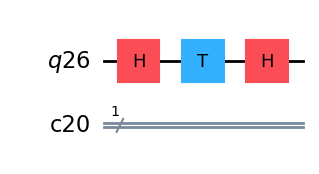

In [37]:
# Write your own solution
# Defining the quantum register with 1 qubit
qr = QuantumRegister(1)

# Defining the classical register with 1 bit
cr = ClassicalRegister(1)

# Defining the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply the Pauli-X gate to the qubit
qc.h(qr[0])
qc.t(qr[0])
qc.h(qr[0])

# Draw the circuit
qc.draw(output='mpl')

Now, run the simulation for a larger number of shots and plot the histogram. Is this the result that you were expecting?

Probabilities:


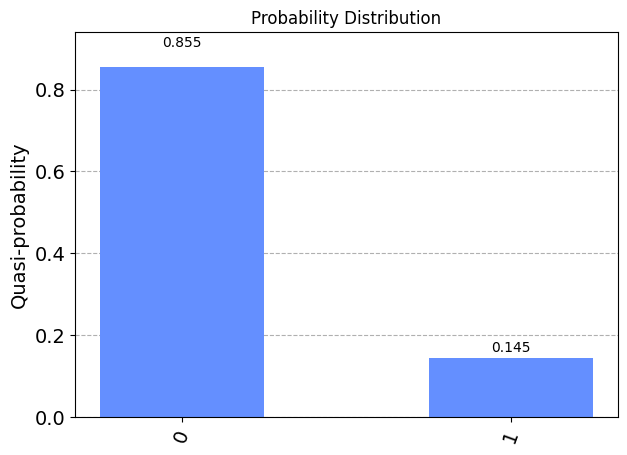

In [39]:
# Write your own solution
# Map the quantum measurement to the classical bit
qc.measure(qr[0], cr[0])

# Execute the simulation for 10000 trials
result, statistics = simulate_circuit(qc, 10000)

# Draw the quantum circuit
qc.draw(output='mpl')

# Plotting the histogram of the results
print("Probabilities:")
plot_distribution(statistics, title = "Probability Distribution")

#### Exercise 2: Multi-qubit systems

You could, correctly, assume that single-qubits quantum systems are not powerful enough. It is necessary to have multi-qubits systems and they also have to be easily implemented on Qiskit. Luckily for us, they are. You only have to follow the same pattern as for single-qubit systems but increasing the number of qubits.

During the workshop, we have discussed the concept of `Uniform Superposition`. I have mentioned that when you have a three qubit system, you will have 8 distinguishable states: $\ket{000}$, $\ket{001}$, $\ket{010}$, $\ldots$, $\ket{111}$. Moreover, when in uniform superposition, each state has the same probability of occurrence: $\mathbf{Pr}\left\{ M(\ket{q_{2}q_{1}q_{0}}) \right\} = 0.125$.

The circuit for uniform superposition is fairly simple. You just need to add Hadamard gates to all the qubits in the system, as follows:

![Exercise2](mid_way_src/exercise2.png)

Build the proposed circuit, run the simulation but only use 100 shots and plot the histogram with the results. Did you manage to get $\mathbf{Pr}\left\{ M(\ket{q_{2}q_{1}q_{0}}) \right\} = 0.125$?

Probabilities:


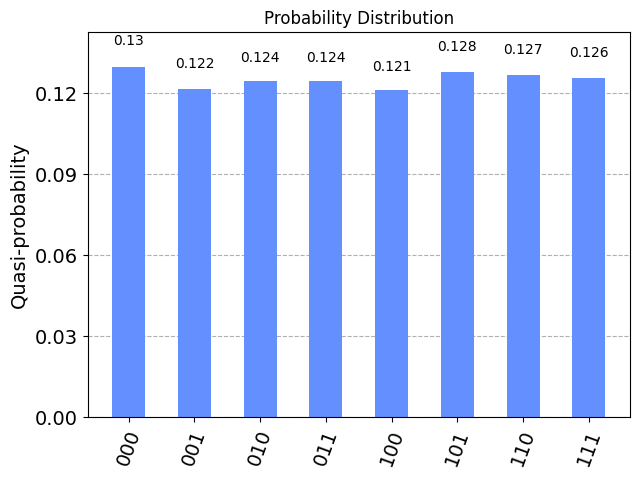

In [34]:
# Write your own solution
# Import qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit import Parameter

#################################################

# Create a quantum register of 3 qubits
qr = QuantumRegister(3)

# create a classical register of 3 bits
cr = ClassicalRegister(3)

# create a quantum circuit
qc = QuantumCircuit(qr, cr)

# apply hadamard gate to the first qubit
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])

qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])

# Draw the quantum circuit
#qc.draw(output='mpl')

# Execute the simulation for 10000 trials
result, statistics = simulate_circuit(qc, 10000)

# Draw the quantum circuit
qc.draw(output='mpl')

# Plotting the histogram of the results
print("Probabilities:")
plot_distribution(statistics, title = "Probability Distribution")
#################################################

#### Exercise 3: Multi-qubit gates

Until now, we have been working on multi-qubit systems, but operating on each qubit separately. Our gates have been applied to single qubits at every time. Let's move to a scenario involving multi-qubit gates (one gate acting on two qubits at the same time). In order to do that, you will need the [CX gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#cx).

You will implement the following quantum circuit (preparing entanglement, remember), run the simulation and plot the histogram.

![Exercise3](mid_way_src/exercise3.png)

Probabilities:


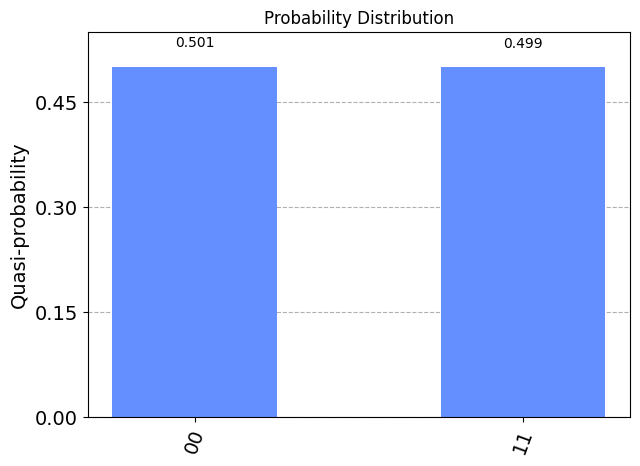

In [41]:
# Write your own solution
# Write your own solution
# Import qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.circuit import Parameter

#################################################

# Create a quantum register of 3 qubits
qr = QuantumRegister(2)

# create a classical register of 3 bits
cr = ClassicalRegister(2)

# create a quantum circuit
qc = QuantumCircuit(qr, cr)

# apply hadamard gate to the first qubit
qc.h(qr[1])
qc.cx(qr[1], qr[0])

qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

# Draw the quantum circuit
qc.draw(output='mpl')

# Execute the simulation for 10000 trials
result, statistics = simulate_circuit(qc, 10000)

# Draw the quantum circuit
qc.draw(output='mpl')

# Plotting the histogram of the results
print("Probabilities:")
plot_distribution(statistics, title = "Probability Distribution")
#################################################